# Fundamentals

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lukeconibear/intro_ml/blob/main/docs/01_fundamentals.ipynb)

In [ ]:
# if you're using colab, then install the required modules
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    %pip install ...

Machine learning and deep learning are large and growing fields.

This course does not attempt to cover them in detail.

Instead, this course aims to provide high-level intuitions and practical guidance to get started.

To learn more, see the {ref}`Online Courses <online_courses>` below.

## Basic ideas

### Overview

Machine learning is a subset of Artificial Intelligence.

It is a range of methods that learn associations from data.

These can be useful for:

- Prediction problems (e.g., pattern recognition).
- Problems cannot program (e.g., image recognition).
- Faster approximations to problems that can program (e.g., spam classification).

### Methods

Within machine learning, there are many different methods.

The main methods are:

- Classic
    - Simple data, clear features.
- Deep learning (neural networks)
    - Compilcated data, unclear features.
- Reinforcement learning
    - No data, interact with environment.
- Ensembles
    - Poor quality data.

We'll focus on _classic machine learning_ and _deep learning_ in this course.

### Classic Machine Learning

...

Fit a line to the data.

### Deep Learning

Deep means more layers.

### Caveats

- Predictions are primarily based on associations, not explanations or causation.
- Predictions and models are specific to the data they were trained on.

- cost function
- gradient descent
- error analysis

R2 (coefficient of determination) 
Any value less than 1, as model can be continually awful 
1 is perfect 
0 is not more information than just predicting the mean 

### Deep learning

Steps 

Inputs 

forward propagate 

predict outputs 

compute loss 

backward propagate 

gradient descent 

update weights and biases 


Scale is driving DL progress 

Bigger training data (Larger data sets (labelled, m)) 

Bigger neural networks 

Now investment and attention drive it forward more 

Neural networks (NN) 

Useful for non-linear, with large number of features 

Singular evaluation metric 

Loss function (error on single training example) 

Cost function (average of loss functions over whole training set) 

## Tools

### [scikit-learn](https://scikit-learn.org/stable/)

Scikit-learn has a wide range of simple and efficient machine learning tools.  

There are ones for:

- [Regression](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) ([examples](https://scikit-learn.org/stable/auto_examples/index.html#examples))
- [Classification](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) ([examples](https://scikit-learn.org/stable/auto_examples/index.html#classification))
- [Clustering](https://scikit-learn.org/stable/modules/clustering.html#clustering) ([examples](https://scikit-learn.org/stable/auto_examples/index.html#cluster-examples))
- And [many more](https://scikit-learn.org/stable/index.html#).

### [TensorFlow](https://www.tensorflow.org/)

...

TensorFlow has a higher-level API (Application Programming Interface) called [Keras](https://keras.io/).

This user-friendly option abstracts away some complexity, so you can focus on your problem.

You can always go to the lower-level API if you want or need to.

### [PyTorch](https://pytorch.org/)

Similar to Keras for TensorFlow, [fastai](https://docs.fast.ai/) is a high-level API for PyTorch.



In [119]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec



For example, let's use [linear regression](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) (i.e., fit a straight line to data):

## Example - Linear regression

Let's start with a simple example fitting a straight line to data.

We'll see how this in done in each of three key tools we cover here: scikit-learn, TensorFlow, and PyTorch.

Let's create some (noisy) data to train on:

In [100]:
def create_noisy_linear_data(num_points):
    x = np.arange(num_points)
    noise = np.random.normal(0, 1, num_points)
    y = 2 * x + noise
    # convert to 2D arrays
    x, y = x.reshape(-1, 1), y.reshape(-1, 1)
    return x, y

In [101]:
x_train, y_train = create_noisy_linear_data(10)

```{caution} 

Input arrays to models needs to be 2 dimensional (2D) i.e., a column of rows.

For example, instead of one row:

`>>> np.arange(10)`  
`array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])`  

Convert this to a column of rows using `.reshape(-1, 1)`:  

`>>> np.arange(10).reshape(-1, 1)`  
`array([[0],`  
`       [1],`  
`       [2],`  
`       [3],`  
`       [4],`  
`       [5],`  
`       [6],`  
`       [7],`  
`       [8],`  
`       [9]])`  

```

First, let's try with **scikit-learn**:

In [103]:
from sklearn import linear_model

In [104]:
model_sklearn = linear_model.LinearRegression()

In [105]:
model_sklearn.fit(x_train, y_train)

LinearRegression()

Now, for **TensorFlow**:

In [106]:
import tensorflow as tf

In [107]:
model_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1]),
])

In [108]:
model_tf.compile(
    optimizer="sgd",
    loss="mean_squared_error",
    metrics=["accuracy"]
)

In [109]:
model_tf.fit(x_train, y_train, epochs=500, verbose=False)

And finally, for **PyTorch**:

In [110]:
import torch

In [130]:
model_torch = torch.nn.Sequential(
    torch.nn.Linear(in_features=1, out_features=1)
)

Now, we can see how well these models fit a line to the data:

In [112]:
y_pred_sklearn = model_sklearn.predict(x_train)

In [116]:
y_pred_tf = model_tf.predict(x_train)

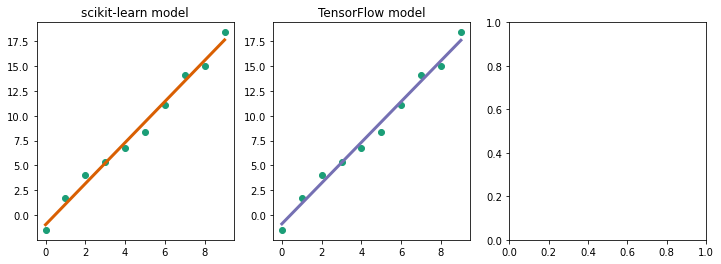

In [128]:
fig = plt.figure(1, figsize=(12, 4))
ax1, ax2, ax3 = fig.subplots(1, 3)

ax1.scatter(x_train, y_train, color="#1b9e77", label='data')
ax1.plot(x_train, y_pred_sklearn, color="#d95f02", linewidth=3)
ax1.set_title('scikit-learn model')

ax2.scatter(x_train, y_train, color="#1b9e77", label='data')
ax2.plot(x_train, y_pred_tf, color="#7570b3", linewidth=3)
ax2.set_title('TensorFlow model')

# ax3.scatter(x_train, y_train, color="#1b9e77", label='data')
# ax3.plot(x_train, y_pred_torch, color="#66a61e", linewidth=3)
# ax3.set_title('scikit-learn model')

plt.show()

Load and split the data:

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

Take a look at one of the digits:

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(train_images[0], cmap=plt.cm.binary);

Preprocess the data:

In [ ]:
def preprocess_data(data):
    data_reshaped = data.reshape((data.shape[0], data.shape[1] * data.shape[2]))
    data_reshaped_normalised = data_reshaped.astype("float32") / 255
    return data_reshaped_normalised

In [ ]:
train_images = preprocess_data(train_images)
test_images = preprocess_data(test_images)

Setup the model:

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

Compile the model:

In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

Fit the model to the training data:

In [ ]:
model.fit(train_images, train_labels, epochs=1, batch_size=128);

Evaluate the model:

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy (R$^2$): {test_acc}")

Use the model for predictions with [`model.predict()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict) (i.e., inference).

In [ ]:
import torch

Check whether you have a GPU:

In [ ]:
if torch.cuda.is_available():
    print(f'Yes, there are {torch.cuda.device_count()} GPUs available.')
else:
    print('No, GPUs are not available.')

## Exercises

```{admonition} Exercise 1

...

```

## {ref}`Solutions <fundamentals>`

## Key Points

```{important}

- [x] _..._

```

## Further information

### Good practices

- ...

### Other options

- ...
 
### Resources

- [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/), Aurélien Géron, 2019, O’Reilly Media, Inc.  
    - [Jupyter notebooks](https://github.com/ageron/handson-ml2).  
- [Deep Learning with Python, 2nd Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff), François Chollet, 2021, Manning.  
    - [Jupyter notebooks](https://github.com/fchollet/deep-learning-with-python-notebooks).  
- [Artificial Intelligence: A Modern Approach, 4th edition](http://aima.cs.berkeley.edu/), Stuart Russell and Peter Norvig, 2021, Pearson.  
- [Machine Learning Yearning](https://www.deeplearning.ai/programs/), Andrew Ng.  
- [Machine Learning for Everyone](https://vas3k.com/blog/machine_learning/).   

(online_courses)=
### Online courses

#### Machine learning

- [Machine learning](https://www.coursera.org/learn/machine-learning), Coursera, Andrew Ng.
    - CS229, Stanford University: [Video lectures](https://www.youtube.com/playlist?list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU).  
- [Artificial Intelligence: Principles and Techniques](https://www.youtube.com/playlist?list=PLoROMvodv4rO1NB9TD4iUZ3qghGEGtqNX), Percy Liang and Dorsa Sadigh, CS221, Standord, 2019.  


#### Deep learning

- [Deep Learning Specialization](https://www.coursera.org/specializations/deep-learning), Coursera, DeepLearning.AI (_NumPy and TensorFlow_)
    - CS230, Stanford University: [Video lectures](https://www.youtube.com/playlist?list=PLoROMvodv4rOABXSygHTsbvUz4G_YQhOb), [Syllabus](http://cs230.stanford.edu/syllabus/)
- [NYU Deep Learning](https://atcold.github.io/NYU-DLSP21/), Yann LeCun and Alfredo Canziani, NYU, 2021 (_PyTorch_)
    - [Video lectures](https://www.youtube.com/playlist?list=PLLHTzKZzVU9e6xUfG10TkTWApKSZCzuBI)  
- [Practical Deep Learning for Coders](https://course.fast.ai/), Jeremy Howard and Sylvain Gugger, 2020. (_PyTorch_)  
    - [Video lectures](https://www.youtube.com/playlist?list=PLfYUBJiXbdtRL3FMB3GoWHRI8ieU6FhfM)
- [NVIDIA Deep Learning and Data Science with GPUs](https://web.cvent.com/event/5f037a53-5be6-4abf-9b48-dc94e8a8ee3a/summary?rt=QZKIZW0GWUGNA6QZE4e55Aummary)
- [Neural Networks for Machine Learning](https://www.youtube.com/playlist?list=PLLssT5z_DsK_gyrQ_biidwvPYCRNGI3iv), Geoffrey Hinton.

    
    
